## Exploring US Traffic Fatality Data

By Ben Van Dyke

The [National Highway Traffic Safety Administration](http://www.nhtsa.gov/) maintains a fatality dataset called the [Fatality Reporting System](http://www-fars.nhtsa.dot.gov/Main/index.aspx). It contains detailed information about every fatal traffic crash in the U.S., including the time of day, location with latitude and longitude, roadway type, and more. This notebook will hopefully provide some helpful Python analysis techniques as well as raise awareness of the very serious societal problem of roadway injury and death.

#### Additional Datasets Used

* Federal Highway Administration - [Vehicle Miles Traveled](https://www.fhwa.dot.gov/policyinformation/statistics/2015/vm2.cfm)
* Centers for Disease Control - [US Causes of Death](http://wonder.cdc.gov/)
* World Health Organization - [Motor Vehicle Death Rates by Country](http://apps.who.int/gho/data/node.main.A997)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import StringIO
import zipfile
import urllib
from __future__ import division, print_function

matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [115]:
output = StringIO.StringIO()
output.write(urllib.urlopen('ftp://ftp.nhtsa.dot.gov/FARS/2015/National/FARS2015NationalCSV.zip').read())
fars_zip = zipfile.ZipFile(output)

fars_zip.extract('accident.csv')

# Read the data file into a pandas DataFrame
df_fatality = pd.read_csv('accident.csv')

### Motor Vehicles Are Third-Leading Cause of Death Due to Injury

In [43]:
# Number of traffic fatalities in the US in 2012 using pandas DataFrame sum function
total_traffic_fatalities = df_fatality.FATALS.sum()
print("2015 Traffic Fatalities: ", total_traffic_fatalities)

2015 Traffic Fatalities:  35092


There were 35,092 traffic fatalities in the U.S. in 2012, or a little more than 11 for every 100,000 people. To put that in perspective, 39,260 women died from breast cancer and 29,720 men died from prostate cancer in 2013, according to the [American Cancer Society](http://www.cancer.org/acs/groups/content/@epidemiologysurveilance/documents/document/acspc-037115.pdf). The fight against these cancers generates a lot of public awareness and fundraising. Fore example, in Chicago the lights on top of skyscrapers turn pink for a month every year. Contrast that with a general public apathy to the number of people dying in traffic crashes at rates comparable to the most-common forms of cancer.

In fact, traffic fatalities are the second-leading cause of death due to injury (non-health and disease related) in the U.S. The CDC has death [statistics](http://wonder.cdc.gov/) through the year 2015. See the query used to generate the data [here](https://gist.github.com/benvandyke/1f2ea505d6c5710cae76aaa18f526930). Here's the bar plot showing fatality rates by injury:

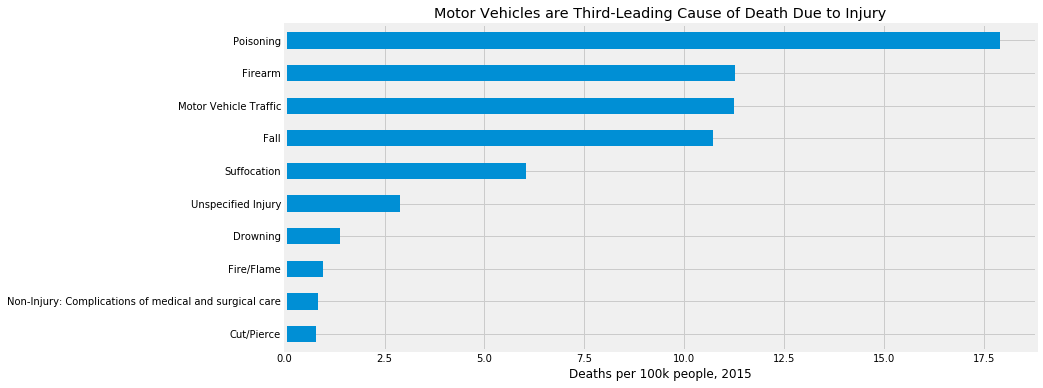

In [42]:
# Get the rates
df_cdc = pd.read_csv('data/cdc_injuries_2015.txt',delimiter='\t')
df_cdc['Rate'] = df_cdc['Deaths'] /  (df_cdc['Population'] / 100000)

# Create the series for plotting
df_cdc_rates = df_cdc.set_index('Injury Mechanism & All Other Leading Causes')['Rate']\
    .dropna()\
    .sort_values()
    
# Plot the top 10
plt.figure(figsize=(12,6))
df_cdc_rates.iloc[-10:].plot(kind='barh',
               title='Motor Vehicles are Third-Leading Cause of Death Due to Injury')
plt.xlabel('Deaths per 100k people, 2015')
plt.ylabel('')
plt.show()

Motor vehicle traffic is the third longest bar on the plot. Drug-related deaths make up the [majority](http://www.cdc.gov/mmwr/preview/mmwrhtml/mm6212a7.htm) of poisoning deaths, and this number has increased substantially in recent years.

Motor vehicles kill at a nearly identical rate to firearms and close to the rate of drugs. Both of these other issues are discussed at length in the news media and by policymakers. We have a decades-long [War on Drugs](http://en.wikipedia.org/wiki/War_on_Drugs) and recent renewed efforts on [restricting](http://en.wikipedia.org/wiki/Federal_Assault_Weapons_Ban) assault weapons.

**Why is there a lack of public awareness of the death toll caused by our driving culture?**

That's a difficult question to answer. The automobile industry is a very important economic engine and source of national pride. The construction of the interstate system through urban areas and accompanying white flight to car-oriented suburbs likely had an impact as well. Since the 1950's, the majority of the built environment in this country has been designed specifically to increase the capacity for automobile travel, often at the expense of other modes. Perhaps we've become so dependent on our cars that we can't confront their deadly impact on our society at large. This is a question that can't be answered in this analysis, but it's important to consider at the same time.

### US Roads Are Much More Deadly Than International Counterparts

That 35,092 killed in 2015 is certainly a large number, how does it compare to other countries in our peer group? The [World Health Organization](http://www.who.int/en/) has that [data](http://apps.who.int/gho/data/node.main.A997).

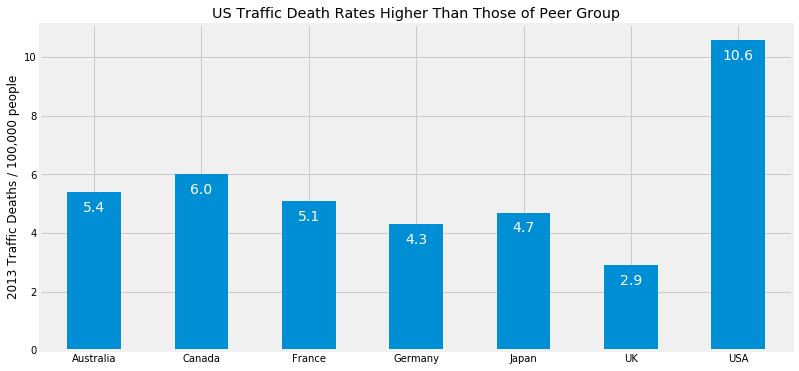

In [75]:
df_who = pd.read_csv('data/who_2013_traffic_deaths.csv', index_col=0, skiprows=1, 
                     names=['Country', 'Deaths', 'Death Rate'])
plt.figure(figsize=(12,6))

# group of peer countries
country_group = ['Australia', 'Canada', 'France', 'Germany', 'Japan',
                 'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
# labels for plot
country_labels = ['Australia', 'Canada', 'France', 'Germany', 'Japan',
                 'UK', 'USA']

ax = df_who.loc[country_group]['Death Rate'].plot(kind='bar')
plt.ylabel("2013 Traffic Deaths / 100,000 people")
plt.title("US Traffic Death Rates Higher Than Those of Peer Group")
plt.xticks(np.arange(len(country_group)), country_labels, rotation=0)
plt.xlabel('')

rects = ax.patches

def autolabel(rects):
    """Attach some labels."""
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height - .3, '%0.1f'%height,
                ha='center', va='top', fontsize=14, color='w')
autolabel(rects)

plt.show()

The U.S. does not compare favorably at all against other wealthy countries with large populations. Even other countries with high automobile share, such as Australia and Canada, have nearly half the traffic death rate of the U.S.. The U.S. is [wealthier](http://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29_per_capita) by GDP per capita than the other nations in the chart, so why is our rate of traffic deaths so much higher?

One possible explanation is that Americans drive more than citizens of other countries. Total vehicle miles traveled by country isn't readily available, but this [table](https://www.fhwa.dot.gov/ohim/onh00/bar4.htm) provided by the FWHA of data from the 1990's shows that Americans drive 16% more miles per capita than Canadians and 46% more than UK citizens. But VMT alone does not explain the difference, the 16% more miles driven by Americans versus Canadians fail to account for the 76% higher fatality rate in the U.S. 

It's not all bad news, though. Until 2015, traffic fatality rates have actually been declining in the U.S. As recently as 2005, there were more than [40,000](http://www-fars.nhtsa.dot.gov/Trends/TrendsGeneral.aspx) fatalities.

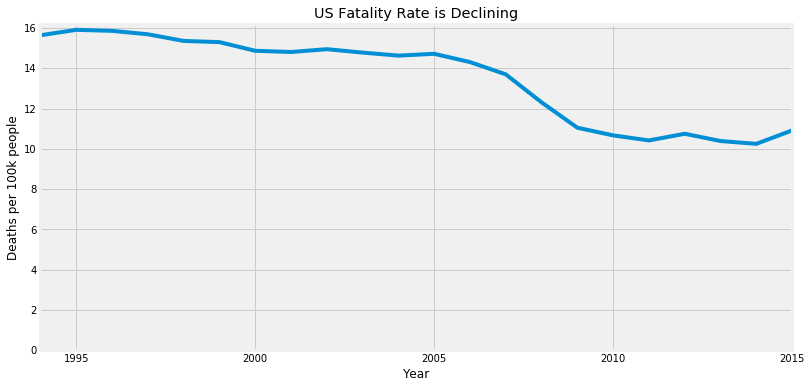

In [116]:
# Load FARS fatality time series
df_annual = pd.read_csv('data/fars_annual_trend.txt',delimiter='\t')
df_annual['Year'] = pd.to_datetime(df_annual['Year'], format='%Y')
series_annual = df_annual.set_index('Year')['Fatality Rate per 100,000 Population']
# Add 2015 per capita, US 2015 Population available here: 
# https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2015_PEPANNRES&src=pt
series_annual[pd.to_datetime('2015-01-01')] = 35092 / (321418820 / 100000)

plt.figure(figsize=(12,6))
series_annual.plot()

plt.ylim(0)
plt.title('US Fatality Rate is Declining')
plt.ylabel('Deaths per 100k people')

plt.show()

The fatality rate has declined significantly since the early 1990's, with a sharp decrease in the second half of the 2000's.

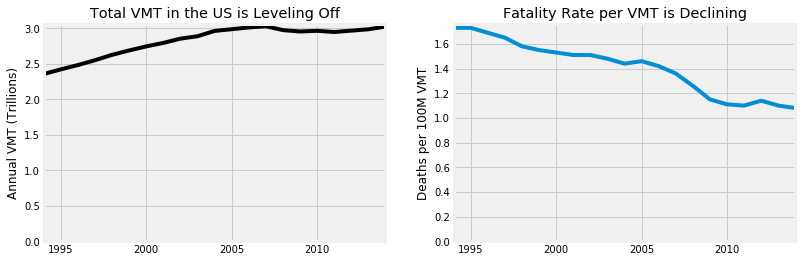

In [96]:
f, axarr = plt.subplots(1,2,figsize=(12,4))
df_annual['VMT (Trillions)'] = df_annual['Vehicle Miles Traveled (Billions)'] / 1000
df_annual.set_index('Year')['VMT (Trillions)'].plot(ax=axarr[0], title='Total VMT in the US is Leveling Off', color='black')
axarr[0].set_ylim(0)
axarr[0].set_xlabel('')
axarr[0].set_ylabel('Annual VMT (Trillions)')

df_annual.set_index('Year')['Fatality Rate per 100 Million VMT'].plot(ax=axarr[1], title='Fatality Rate per VMT is Declining',
                                             )
axarr[1].set_xlabel('')
axarr[1].set_ylim(0)
axarr[1].set_ylabel('Deaths per 100M VMT')
plt.show()

The absolute number of fatalities has declined, but so has the fatality rate per vehicle miles traveled (VMT), which indicates that we are making progress towards safer roads. Since 1994, the fatality rate has dropped while VMT increased. In recent years, Americans are driving less, with several year-over-year decreases in CMTd since the mid-2000's. The continued decline in the fatality rate - even with a decreasing denominator - is an encouraging sign.

### Drunk Driving

One of the first things that comes to mind when I think of traffic fatalities is drunk driving. From a young age, I recall being repeatedly warned about the dangers of drunk driving in school, on television, etc. Penalties are stiff, yet it does not seem to deter significant numbers of people from getting behind the wheel while intoxicated. The FARS data includes a drunk driver indicator, the value in the DRUNKEN_DR column indicates the number of drunk drivers involved in each fatal crash.

In [97]:
# Number of fatalities in crashes involving a drunken driver
df_dd = df_fatality.FATALS[df_fatality.DRUNK_DR >= 1].sum()

print("Fatalities involving a drunk driver: ", df_dd)
print("Percent of total traffic fatalities involving drunk driver: ", 
      '{0:.1f}%'.format(df_dd / total_traffic_fatalities * 100))

Fatalities involving a drunk driver:  9860
Percent of total traffic fatalities involving drunk driver:  28.1%


Nearly a third of all traffic fatalities involve a drunk driver. Despite all the education and public campaigns and increased enforcement, drunk driving is still taking a massive toll on human life every year.

What else can we learn about drunk driving from the data?

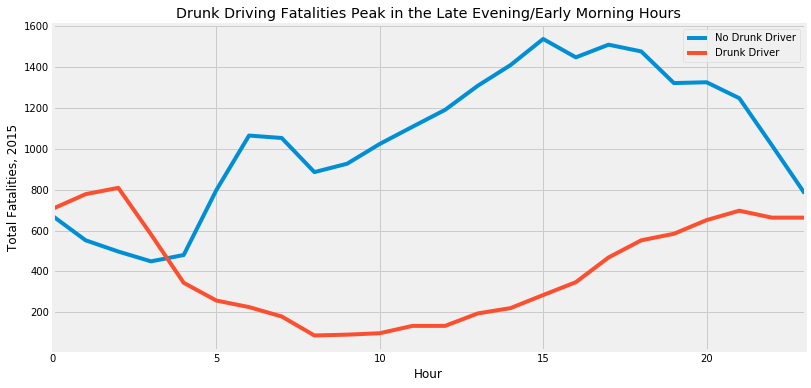

In [118]:
# pandas DataFrame pivot by hour that crash occurred and drunk driving
fatal_pivot = df_fatality.pivot_table(index=['HOUR'], columns=['DRUNK_DR'],
                                         values='FATALS', aggfunc=np.sum).fillna(0)
# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3]].sum(axis=1)

fp = fatal_pivot[[0,'DRUNK_DR_SUM']].iloc[:-1].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']

plt.rcParams['figure.figsize'] = (12,6)
fp.plot()

plt.title('Drunk Driving Fatalities Peak in the Late Evening/Early Morning Hours')
plt.ylabel('Total Fatalities, 2015')
plt.xlabel('Hour')

plt.show()

Clearly the late evening and early morning hours show high levels of drunken driving activity. Fatalities caused by drunken drivers are nearly double those caused by sober drivers between the hours of 2:00 and 4:00 a.m.

I have not been able to find VMT data by hour for U.S., but this [report](http://www.fhwa.dot.gov/policyinformation/pubs/hf/pl11028/chapter4.cfm#fig48) from the Federal Highway Administration suggests that VMT in the late evening/early morning is a fraction of the peak volume during daytime commuting hours. On a per-VMT basis, the roads at night are more dangerous than the absolute numbers show, as the elevated fatality numbers are observed despite dramatically fewer people driving at those times.

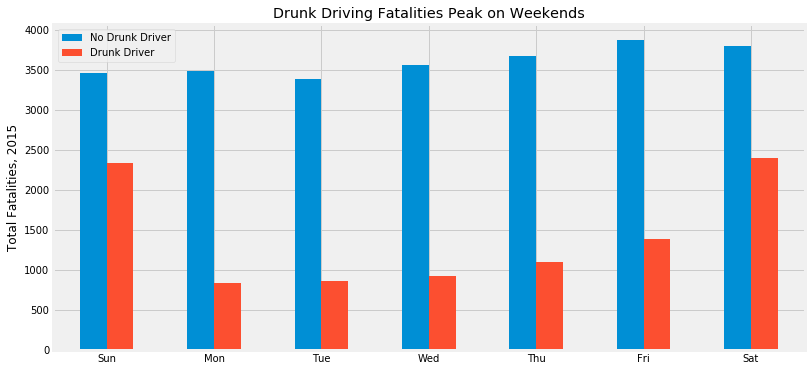

In [119]:
# Now look at day of week
fatal_pivot = df_fatality.pivot_table(index=['DAY_WEEK'],columns=['DRUNK_DR'],
                                         values='FATALS', aggfunc=np.sum)
# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3]].sum(axis=1)
fp = fatal_pivot[[0,'DRUNK_DR_SUM']].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']
# Days of week are indexed 1=Sunday, 2=Monday, ..., 6=Saturday
labels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
fp.index = labels
fp.plot(kind='bar')

plt.xticks(rotation=0)
plt.ylabel('Total Fatalities, 2015')
plt.title('Drunk Driving Fatalities Peak on Weekends')

plt.show()

As you might expect, drunk driving fatalities peak substantially on the weekends, with non-drunk fatalities remaining relatively consistent across all days of week.

### Weather Conditions

The FARS data contains natural environment features such as LGT_COND and WEATHER which encode information on light conditions (light, dusk, etc) and weather (rain, fog, etc), respectively. Intuitively, I expect more fatalities to occur in darker conditions or harsh weather. 

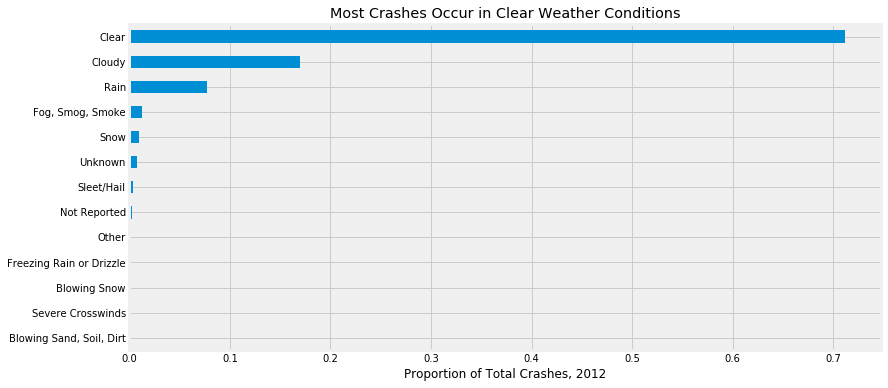

In [112]:
weather_group = df_fatality.groupby(['WEATHER']).sum()['FATALS']
labels = ['Clear', 'Rain', 'Sleet/Hail', 'Snow', 'Fog, Smog, Smoke',
          'Severe Crosswinds', 'Blowing Sand, Soil, Dirt', 'Other',
          'Cloudy', 'Blowing Snow', 'Freezing Rain or Drizzle', 'Not Reported', 'Unknown']
weather_group.index = labels

(weather_group.sort_values() / weather_group.sum()).plot(kind='barh')

plt.title('Most Crashes Occur in Clear Weather Conditions')
plt.xlabel('Proportion of Total Crashes, 2012')

plt.show()

The majority of fatalities occur with no weather affecting visibility. Rain is the only precipitation form that shows up significantly. Perhaps people reduce driving during adverse conditions or drive more cautiously - leading to fewer deaths.

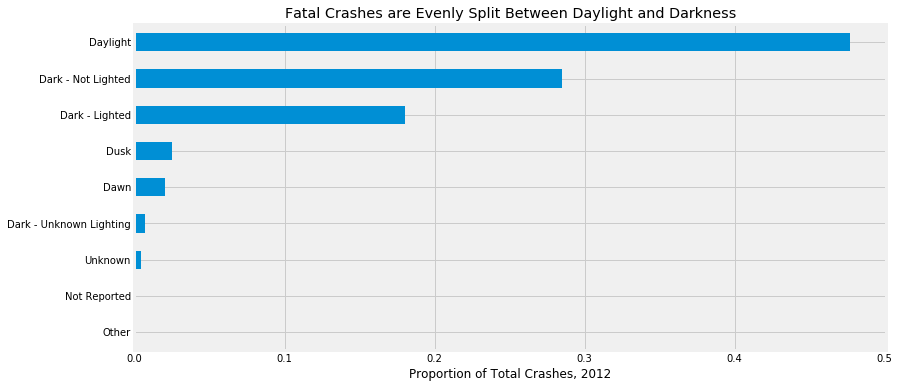

In [114]:
# pandas groupby on LGT_COND column
light_group = df_fatality.groupby(['LGT_COND']).sum()['FATALS']
labels = ['Daylight','Dark - Not Lighted', 'Dark - Lighted',
          'Dawn', 'Dusk', 'Dark - Unknown Lighting', 'Other',
          'Not Reported', 'Unknown']
light_group.index = labels

(light_group.sort_values() /  light_group.sum()).plot(kind='barh')

plt.title('Fatal Crashes are Evenly Split Between Daylight and Darkness')
plt.xlabel('Proportion of Total Crashes, 2012')

plt.show()

At first glance, it appears that more fatalities occur during daylight. However, adding the two dark categories together will almost equal the daylight number. Going back to the drunk driving analysis, I don't have VMT by hour, but it does look like VMT [drops](http://www.fhwa.dot.gov/policyinformation/pubs/hf/pl11028/chapter4.cfm#fig48) off at night. I expect that the rate per VMT is much higher in the dark than it is during the day, similar to what we saw for hour in the drunk driving component.

## Conclusions

Performing some base-level analysis on the FARS data was an interesting exercise. I think there's additional avenues to pursue with the dataset itself, especially the geographic elements, as well as joining it with other datasets. Here's what I learned:

* The U.S. has high rate of traffic fatalities relative to other wealthy countries
* We have made real progress in reducing deaths in recent years
* Drunk driving is still a huge social problem causing significant loss of life
* Fatal drunk driving crashes are more likely to occur late at night, especially on the weekends
* Weather is not a big factor, fatal crashes occur overwhelmingly in clear atmospheric conditions
* Traffic deaths are more likely to occur in dark conditions than daylight